In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import importlib
import euler_utils
import plotting_utils
import utils
importlib.reload(euler_utils)
importlib.reload(plotting_utils)
importlib.reload(utils)

/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/site-packages/pyproj/__init__.py:78: UserWarning: Valid PROJ data directory not found. Either set the path using the environmental variable PROJ_LIB or with `pyproj.datadir.set_data_dir`.
  warnings.warn(str(err))


<module 'utils' from '/cluster/home/mfrancesc/IVT/eqasim-java/switzerland/Analysis_notebooks/utils.py'>

In [3]:
work_folder = '/cluster/work/ivt_vpl/mfrancesc/SA_scenario/'

In [4]:
data_10_pct_average_shapefile = euler_utils.read_output(work_folder + 'no_rejections_4000_10_pct_average_shapefile')
euler_utils.compute_delay_factor_from_estimated(data_10_pct_average_shapefile['drt_trips_stats'])

100%|██████████| 51/51 [00:00<00:00, 518.98it/s]


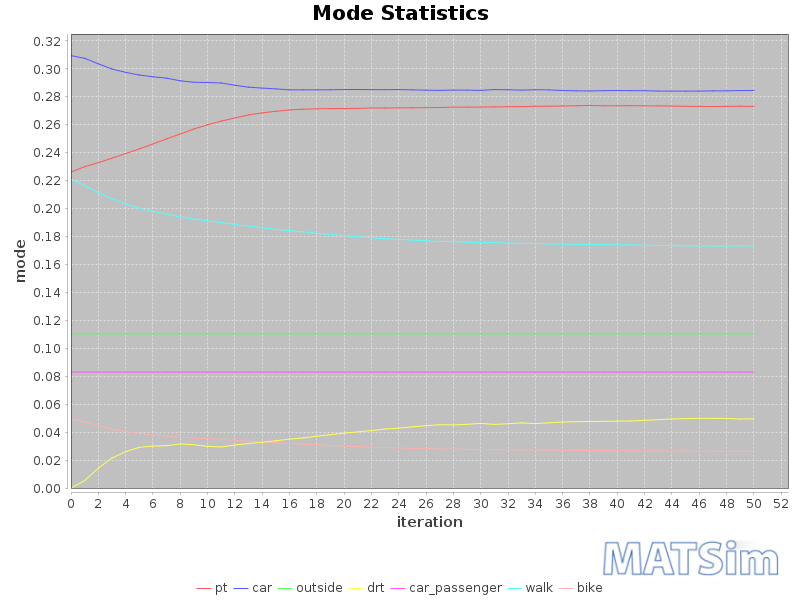

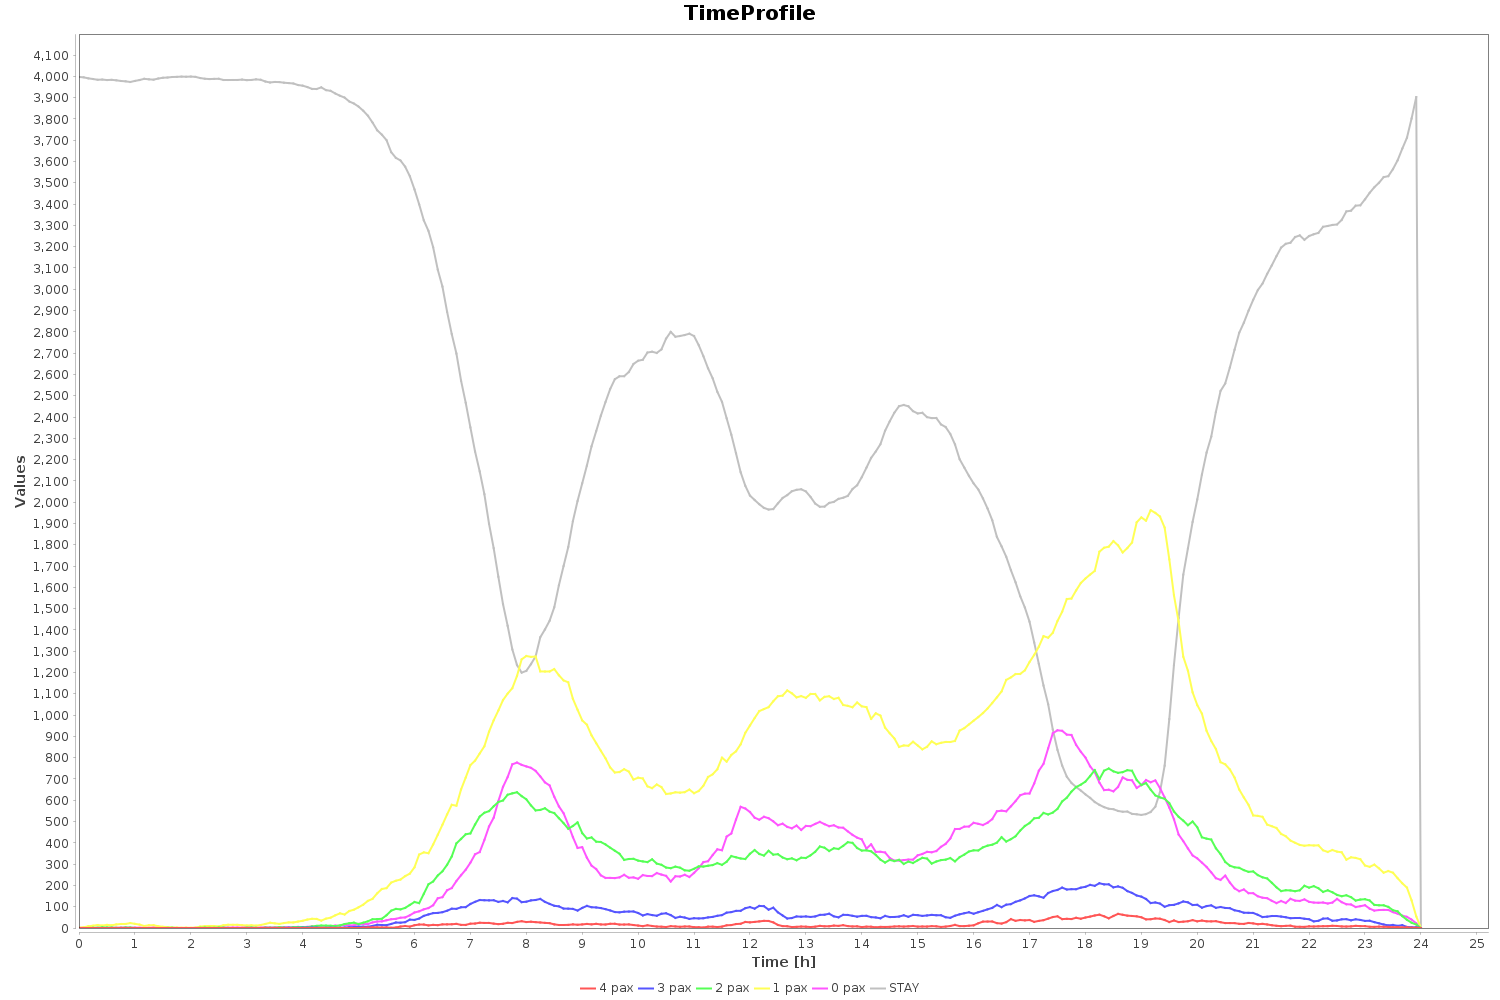

In [5]:
display(plotting_utils.show_modeshare(work_folder + 'no_rejections_4000_10_pct_average_shapefile'))
display(plotting_utils.show_occupancy_profile(work_folder + 'no_rejections_4000_10_pct_average_shapefile'))

count         mean          std  min         25%          50%  \
0  189684.0  2243.405472  2717.323618  0.0  441.413311  1117.201883   

           75%          90%          95%           99%          max  
0  2989.463268  6035.557341  8214.858111  12146.662747  22225.00171

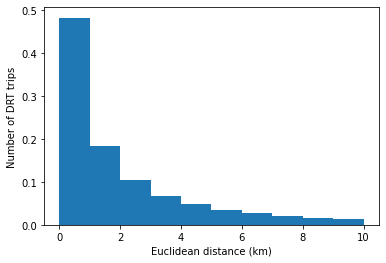

In [6]:
plotting_utils.plot_euclidean_distance_ditribution(data_10_pct_average_shapefile)

We see that most of the trips happen in the range (0-3km) with 75% of the trips in this range.

In [7]:
start_time = 6
end_time = 24
bin_duration_min = 15
min_distance = 250
max_distance = 10000
bin_distance_m = 200

The parameters can be changed to plot the desired plots:

**plot_estimated**: Also plots the DF using the estimated travel time provided by the DRT

**plot_using_sum**: Also plots the DF calculated using the division of sums of the total travel time by the total predicted time

**filter_router_zeros**: This filters the trips that have a 0 in the predicted travel time by the router this was useful before when the delay factor was calculated just dividing the travel time by the prediction but now the DF calculated by MatSIM checks first if the predicted time by the router is 0 and in that case it uses the travel time predicted by DRT

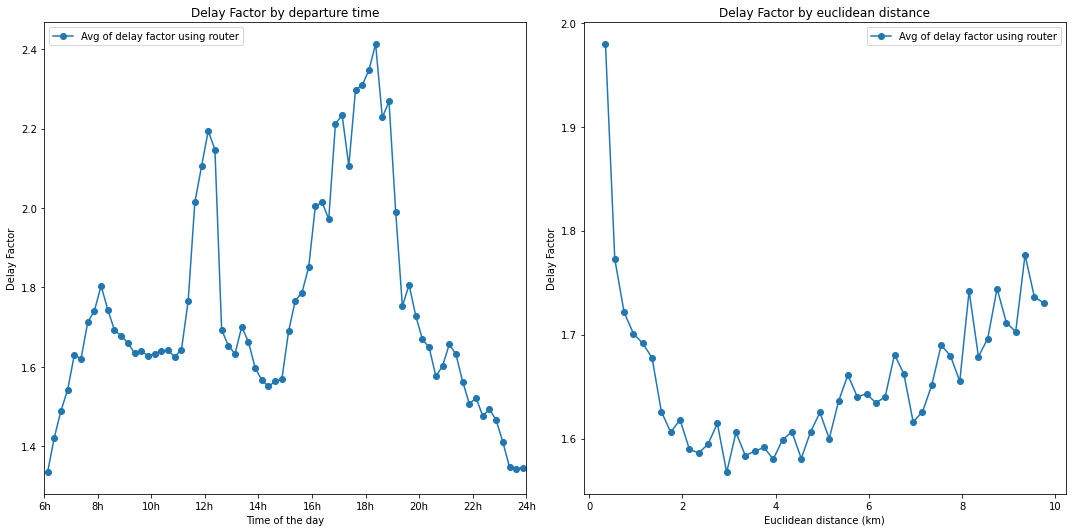

In [8]:
plotting_utils.plot_delay_factor(data_10_pct_average_shapefile, start_time, end_time, bin_duration_min,
                 min_distance, max_distance, bin_distance_m, iteration=50, 
                plot_estimated=False, plot_using_sum=False, filter_router_zeros=False)

The delay factor is computed using the router in case the predicted time is different than 0 and using the DRT estimation in case the router predicts 0.
The DF changes by time of the day in a similar way than the waiting time but also changes with euclidean distance.

We plot different time bins and distance bins (We can use the same parameters as before):

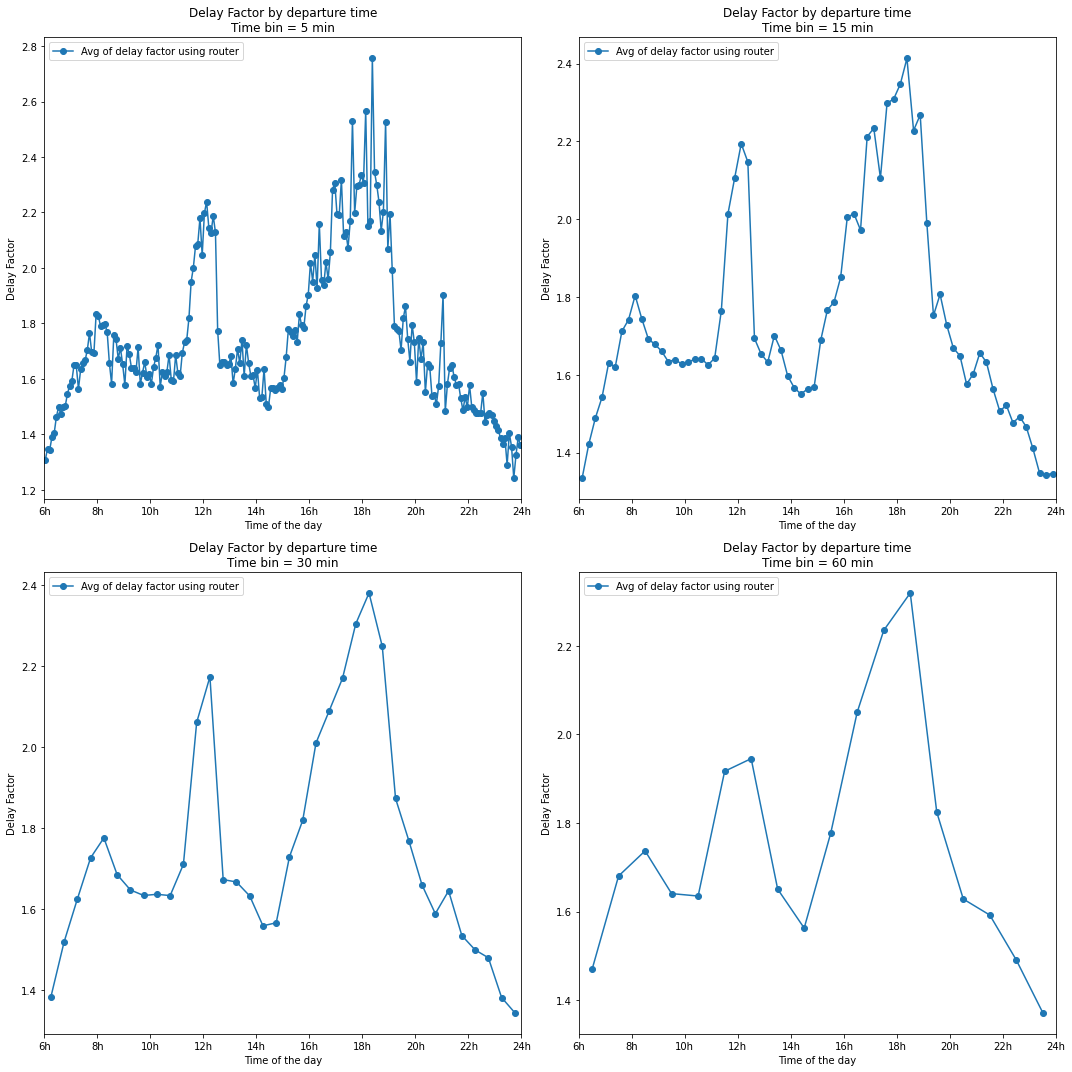

In [9]:
bin_durations_min = [5,15,30,60]
plotting_utils.plot_df_multiple_time_bins(
    data_10_pct_average_shapefile, start_time, end_time, bin_durations_min, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False)

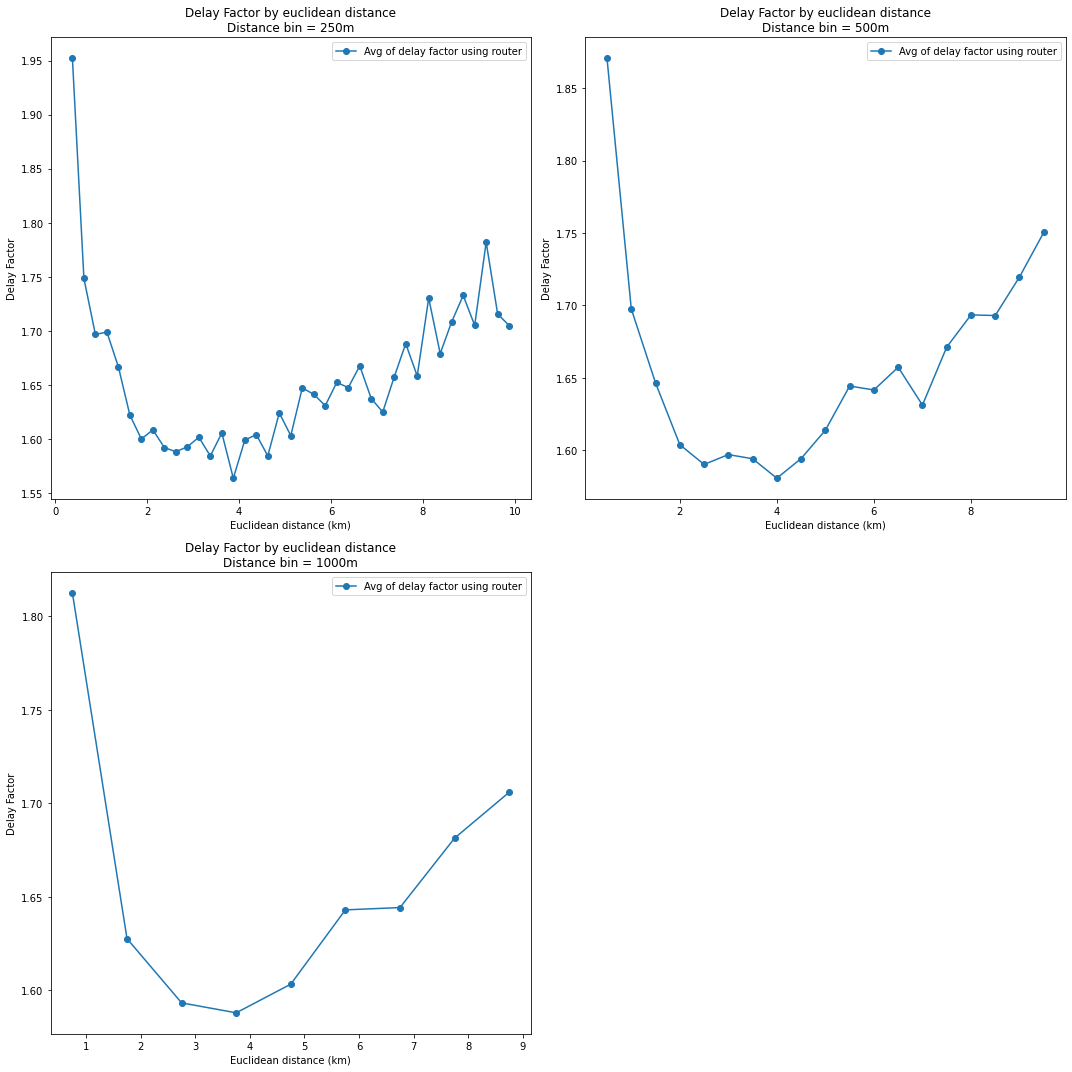

In [10]:
bin_distances_m = [250, 500, 1000]
plotting_utils.plot_df_multiple_distance_bins(
    data_10_pct_average_shapefile, min_distance, max_distance, bin_distances_m, iteration=-1,
    plot_estimated=False, plot_using_sum=False, filter_router_zeros=False)

We plot the waiting times:

We can change also the **filter_router_zeros** parameter to filter the trips with 0 travel time predicted by the router but this has no effect on the waiting time, so probably it should not be done.

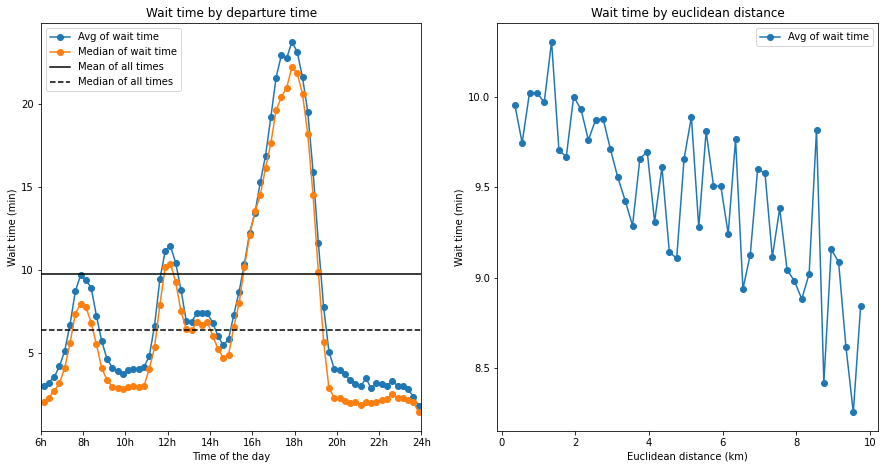

In [11]:
plotting_utils.plot_waiting_time(
    data_10_pct_average_shapefile, start_time, end_time, bin_duration_min,
    min_distance, max_distance, bin_distance_m, iteration=50,
    filter_router_zeros=False)

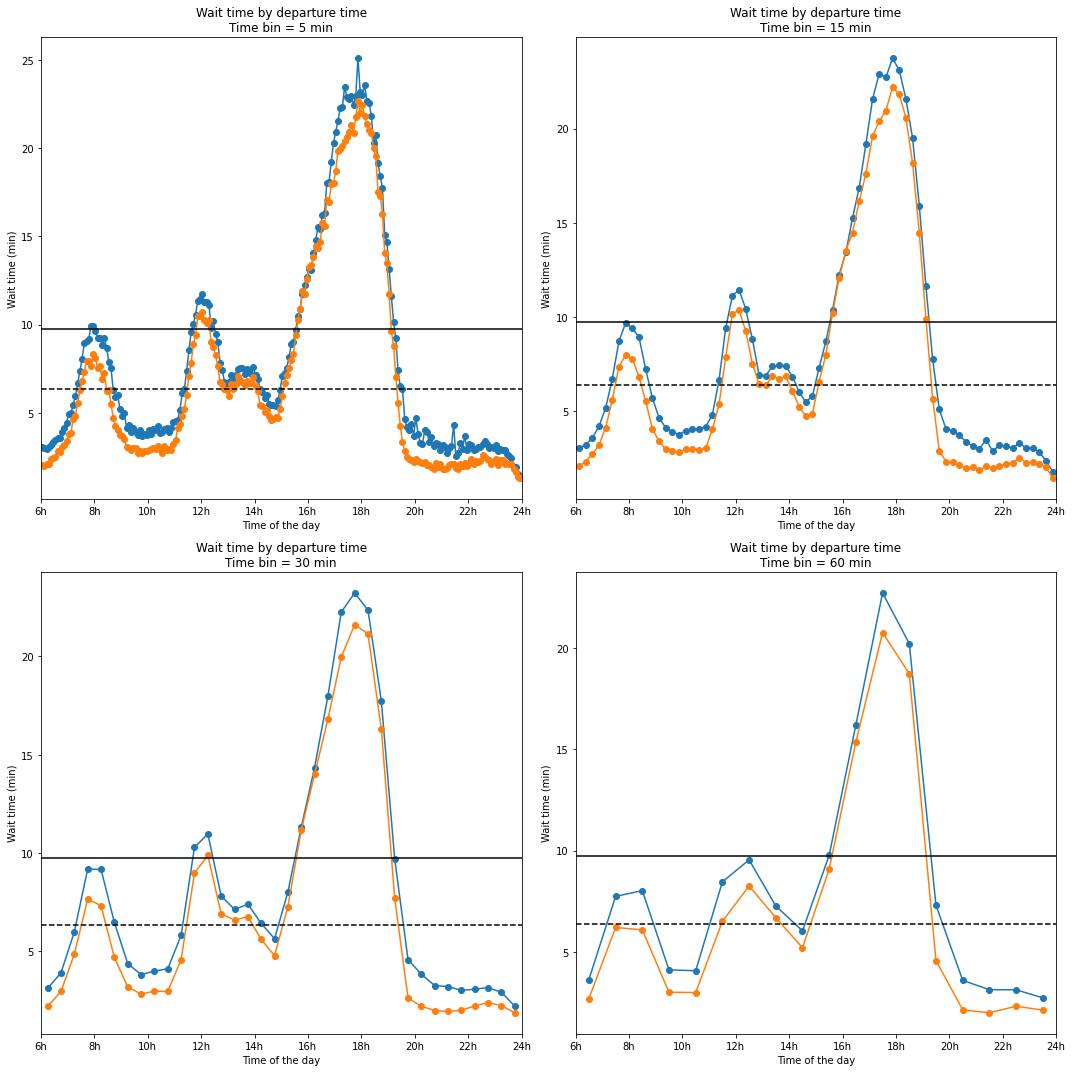

In [12]:
plotting_utils.plot_waiting_time_multiple_time_bins(
    data_10_pct_average_shapefile, start_time, end_time, bin_durations_min, iteration=50,
    filter_router_zeros=False)

The waiting time changes a lot depending on the time of the day but the euclidean distance has nearly no effect (it looks like it decreases with distance but it has high variance and also the difference is 10 minutes to 8.5 which is really small compared to the difference between times of the day)

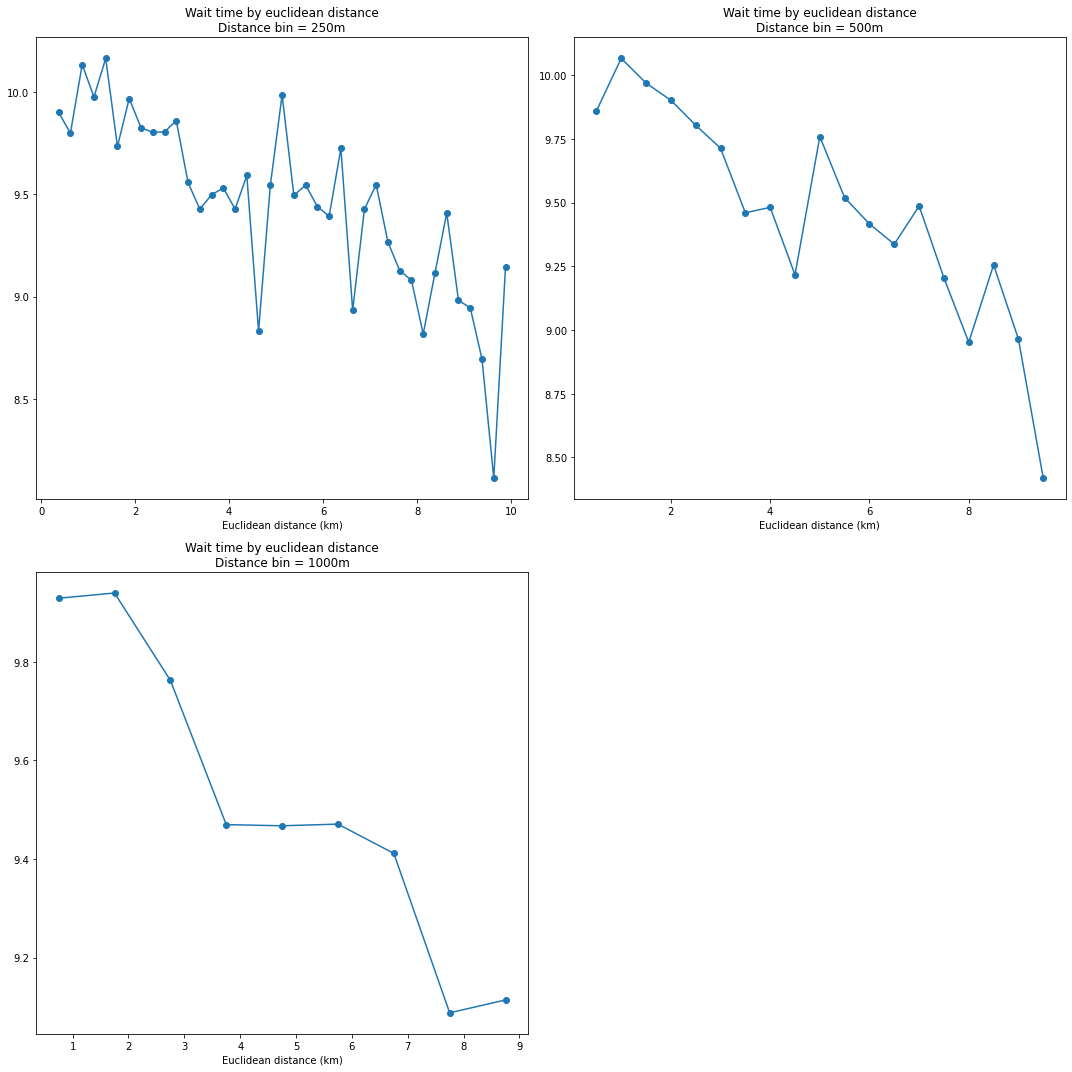

In [13]:
bin_distances_m = [250,500,1000]
plotting_utils.plot_waiting_time_multiple_distance_bins(
    data_10_pct_average_shapefile, min_distance, max_distance, bin_distances_m, iteration=50,
    filter_router_zeros=False)

In [14]:
lake_path = "/cluster/work/ivt_vpl/mfrancesc/lake/g1s20.shp"
zurich_districts_path = "/cluster/work/ivt_vpl/mfrancesc/city_districts/data/stzh.adm_stadtkreise_v.shp"
zurich_shp_path = '/cluster/work/ivt_vpl/mfrancesc/ScenarioBoundary/zurich_city_5km.shp'

Imputing 12  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 13.62it/s]


no. of trips outside the district:  95785


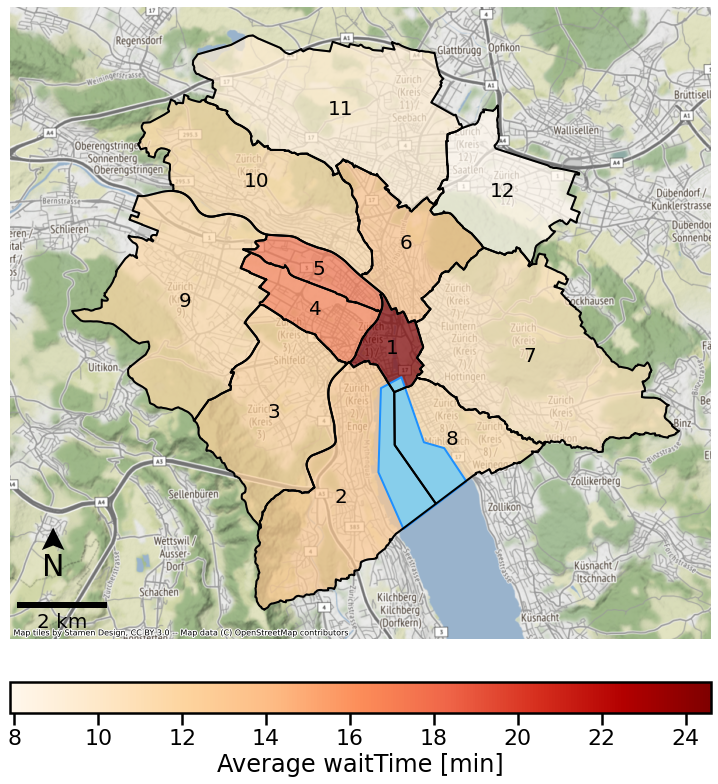

In [15]:
plotting_utils.plot_districts_wait_time(data_10_pct_average_shapefile['drt_trips_stats'][-1], lake_path, zurich_districts_path)

Imputing 1621  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.57it/s]


Imputing 429  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.55it/s]


Imputing 198  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.70it/s]


Imputing 116  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.81it/s]


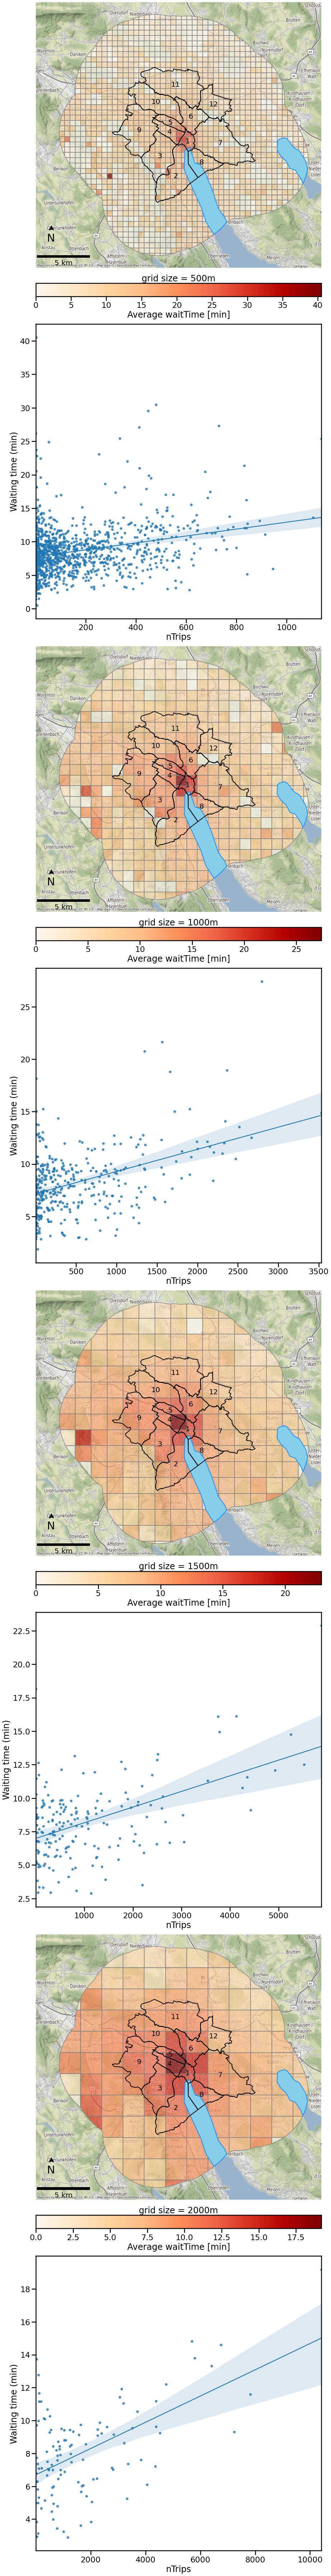

In [16]:
grid_sizes = [500,1000,1500,2000]
plotting_utils.plot_multigrid_wait_time(grid_sizes, data_10_pct_average_shapefile['drt_trips_stats'][-1], zurich_shp_path, 
                         lake_path, zurich_districts_path, map_limit=None)


Imputing 12  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 13.89it/s]


Imputing 12  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.00it/s]


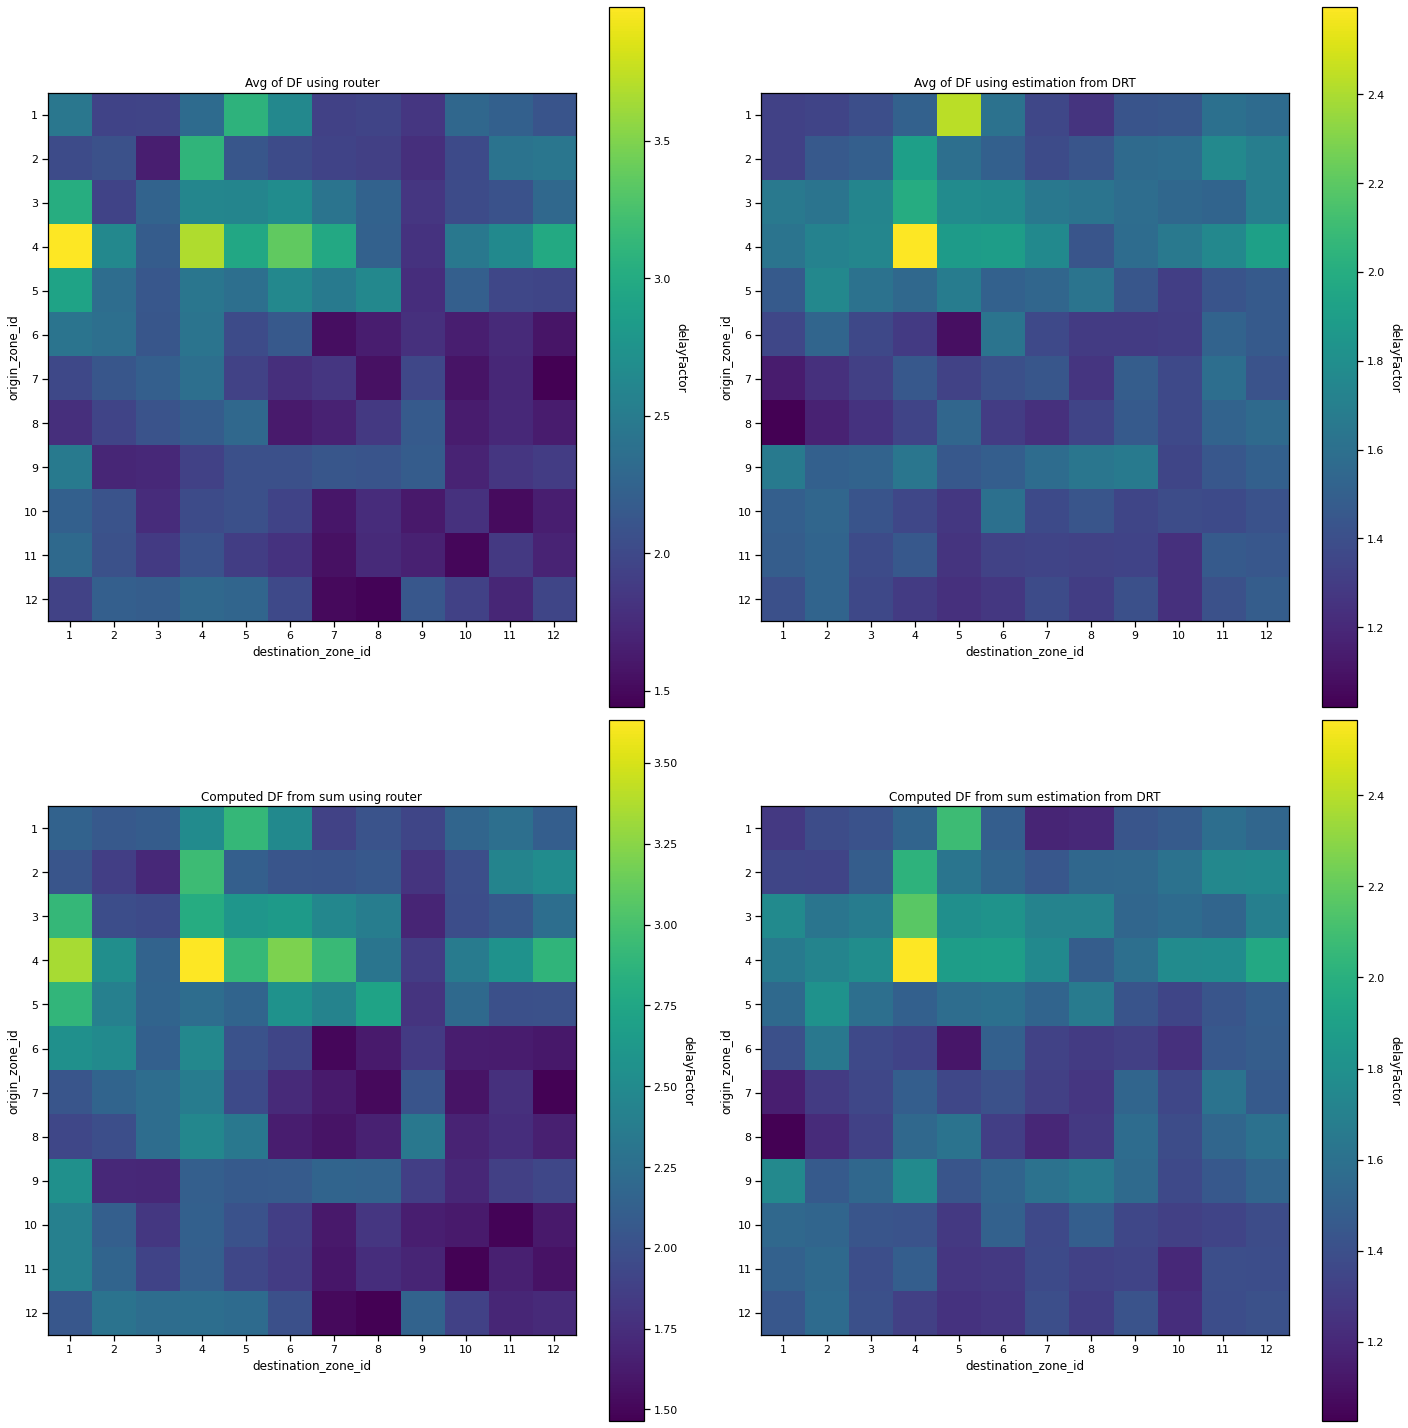

In [17]:
zones = plotting_utils.get_zurich_districts_gpd(zurich_districts_path)
plotting_utils.plot_OD_delayFactor_heatmaps(data_10_pct_average_shapefile['drt_trips_stats'][-1], 
                                            zones, "district_id")

Most of the trips start or end in districts 1-5 and then the DF when a trip starts or ends in this area looks higher because vehicles probably have to divert to pick up other people.

Although it looks like there is an effect in the DF depending on the OD I am not sure we should bin it because it will have too few trips each OD pair and the data may not be reliable.

We plot the heatmap using the 2000m grid and we can clearly see that there's a lot of OD pairs that have no data so I think the data that we have won't be reliable.

Imputing 116  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.62it/s]


Imputing 116  zones onto 189684  points by spatial join...


100%|██████████| 18/18 [00:01<00:00, 14.54it/s]


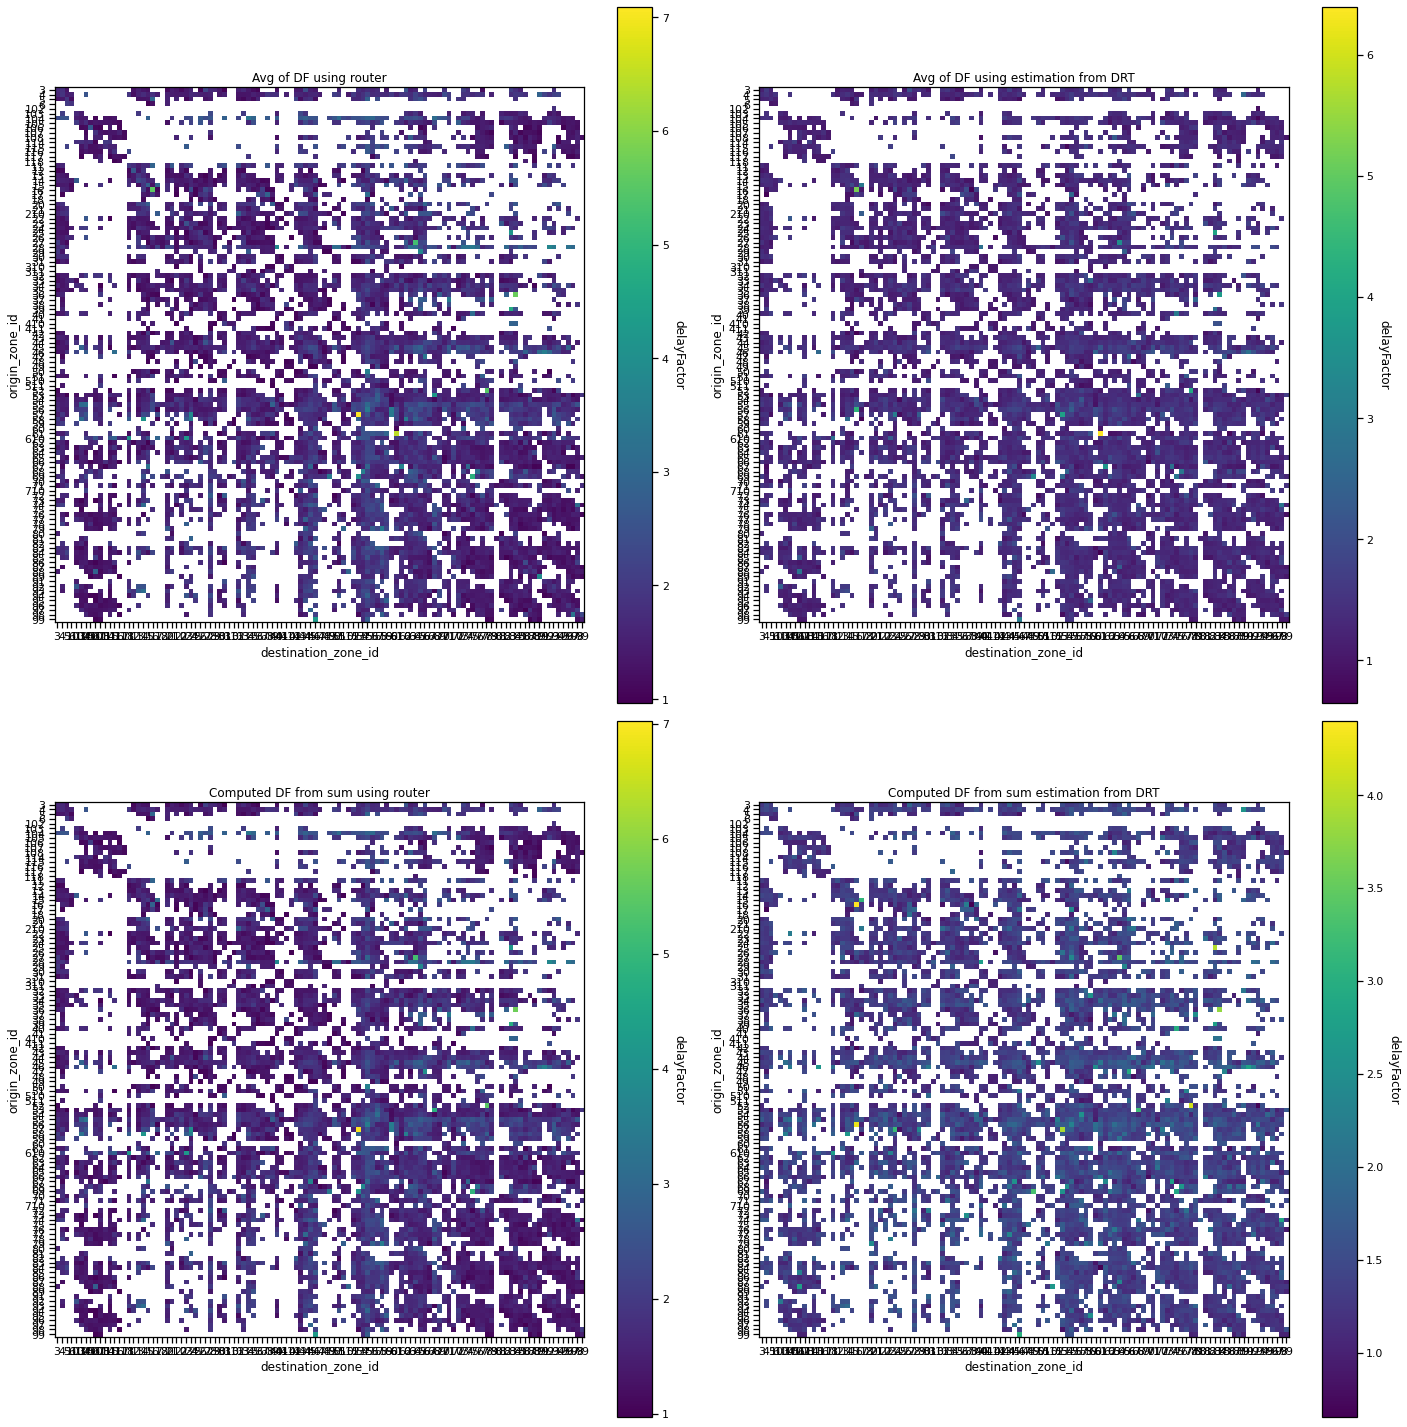

In [18]:
zones = utils.create_grid_from_shapefile(zurich_shp_path, 2000)
plotting_utils.plot_OD_delayFactor_heatmaps(data_10_pct_average_shapefile['drt_trips_stats'][-1], 
                                            zones, "grid_id")

In [ ]:
data_10_pct_average_shapefile['drt_trips_stats'][-1][data_10_pct_average_shapefile['drt_trips_stats'][-1].routerUnsharedTime == 0]

In [ ]:
data_10_pct_average_shapefile['drt_trips_stats'][-1].delayFactor.describe()

In [ ]:
last_drt_trips_stats = data_10_pct_average_shapefile['drt_trips_stats'][-1].copy(deep=True)
last_drt_trips_stats['euclidean_distance'] = np.sqrt((last_drt_trips_stats.startX - last_drt_trips_stats.endX)**2 + 
        (last_drt_trips_stats.startY - last_drt_trips_stats.endY)**2)

In [ ]:
last_drt_trips_stats[last_drt_trips_stats.routerUnsharedTime == 0].euclidean_distance.describe()